In [1]:
import matplotlib.pyplot as plt
import matplotlib.artist as art
import numpy as np
from pylab import imshow,show
from scipy import signal
from scipy import integrate as int

### Exercise 8.1: Low Pass Filter

With a low pass filter we are left with the differential equation:

$$\frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in}-V_{out})$$

a) Write a program to solve for $V_{out}(t)$ using 4th order Runge-Kutta method when the input signal is a square wave with f = 1 and A = 1:

$$V_{in}(t) = \begin{cases}
1 & \text{if } |2t| \text{ is even} \\
-1 & \text{if } |2t| \text{ is odd} \\
\end{cases}$$

where $|x|$ means x rounded down to the next lowest integer.  Make plots of the output of the vilter circuit from t = 0 to t = 10 when RC = 0.01, 0.1, and 1.  Initial condition $V_{out}(0) = 0$

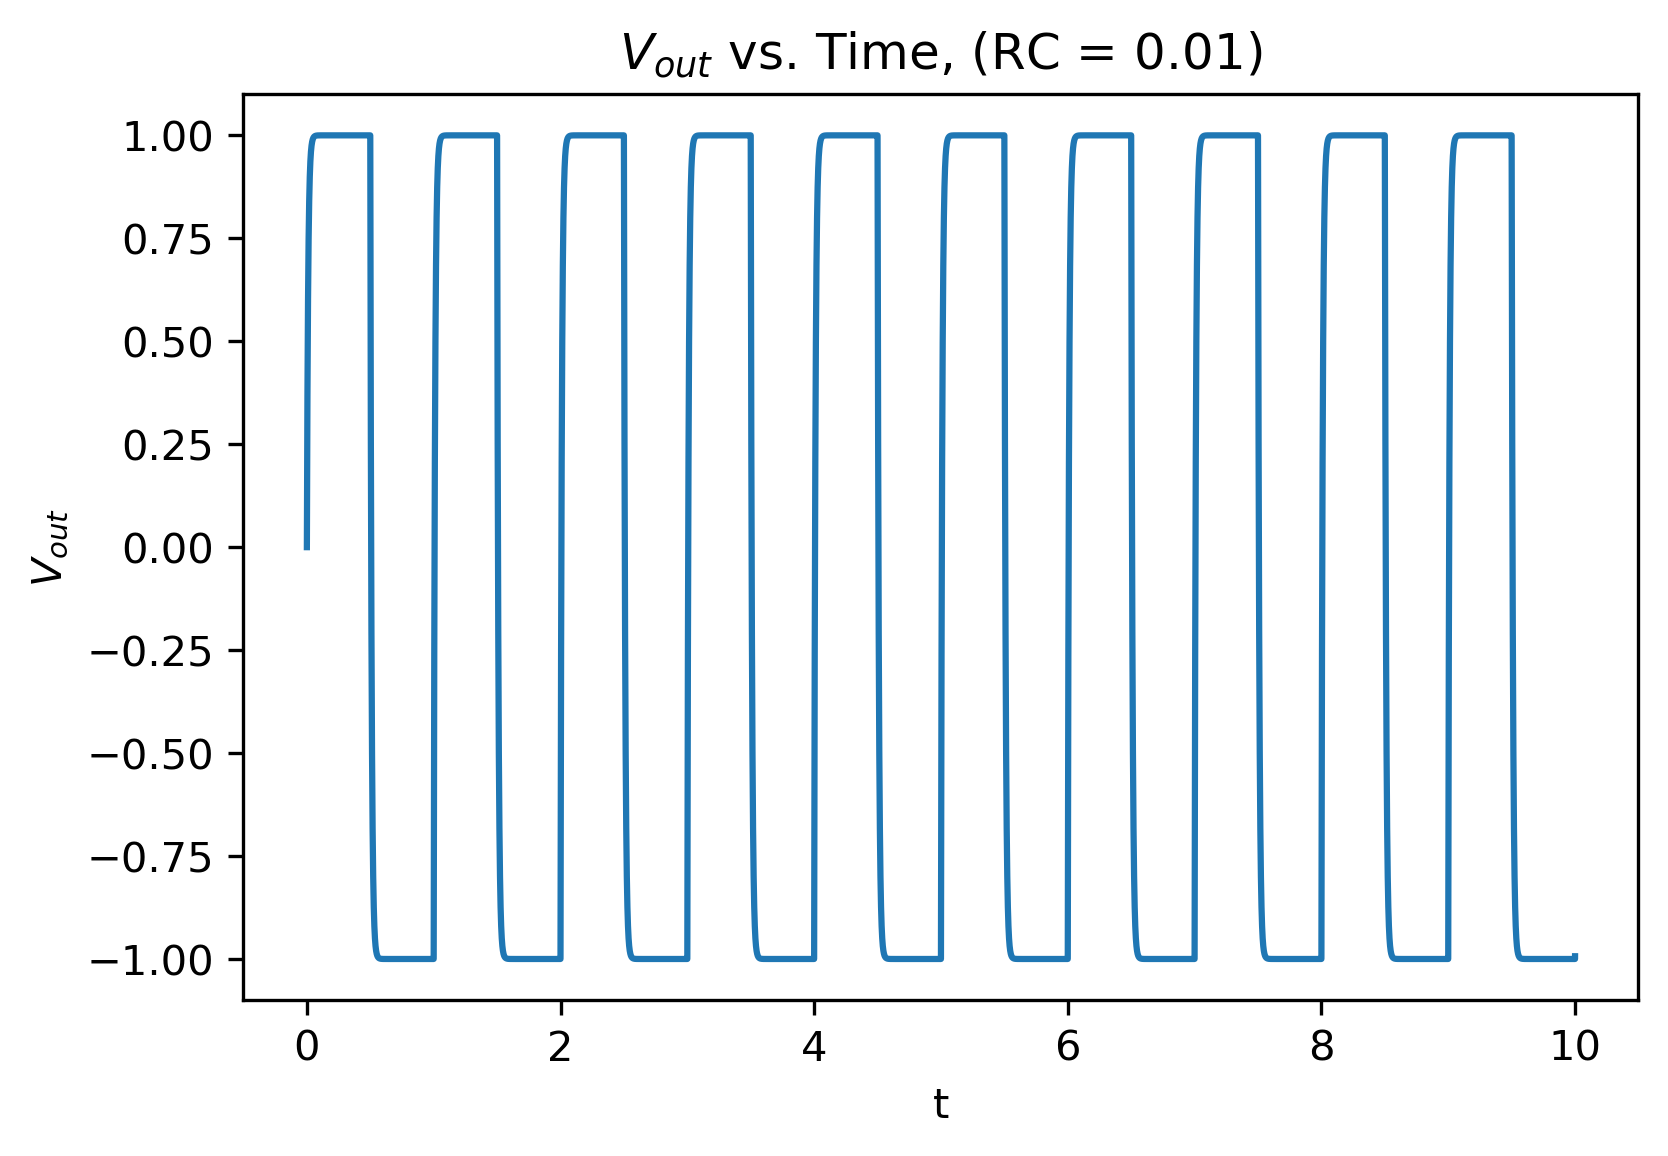

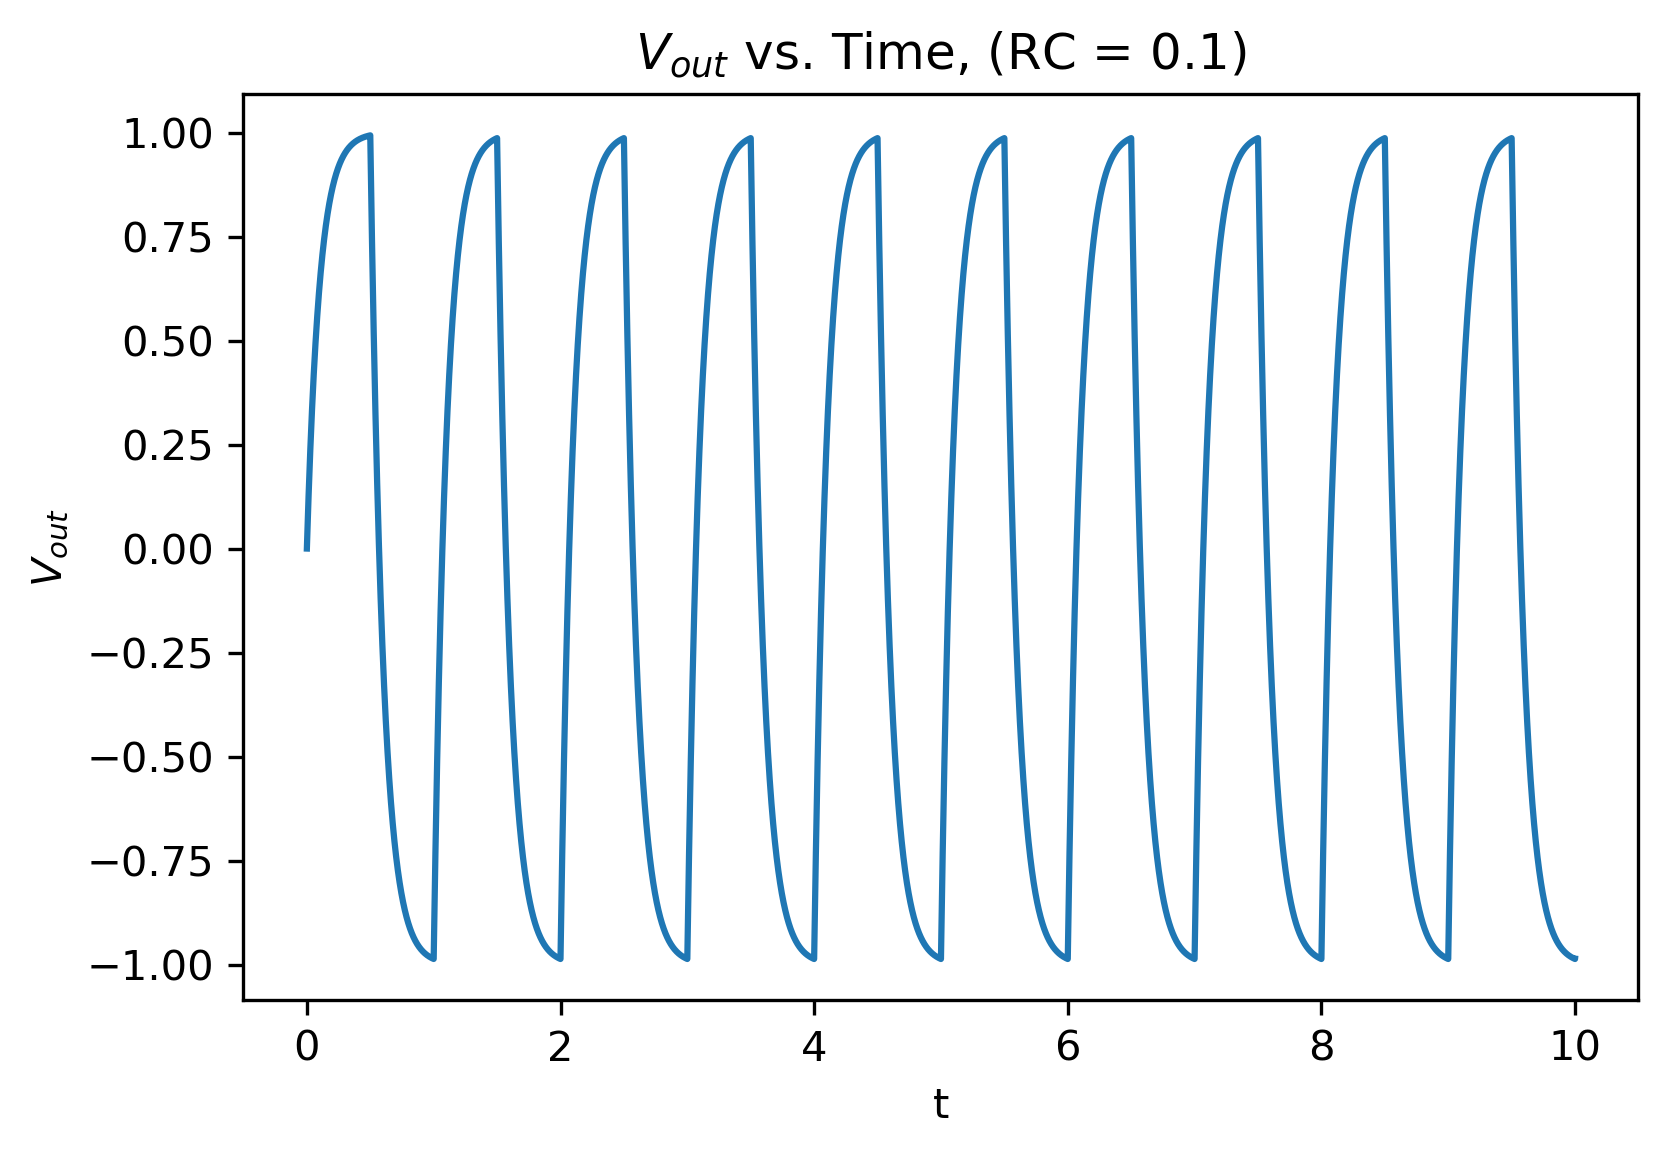

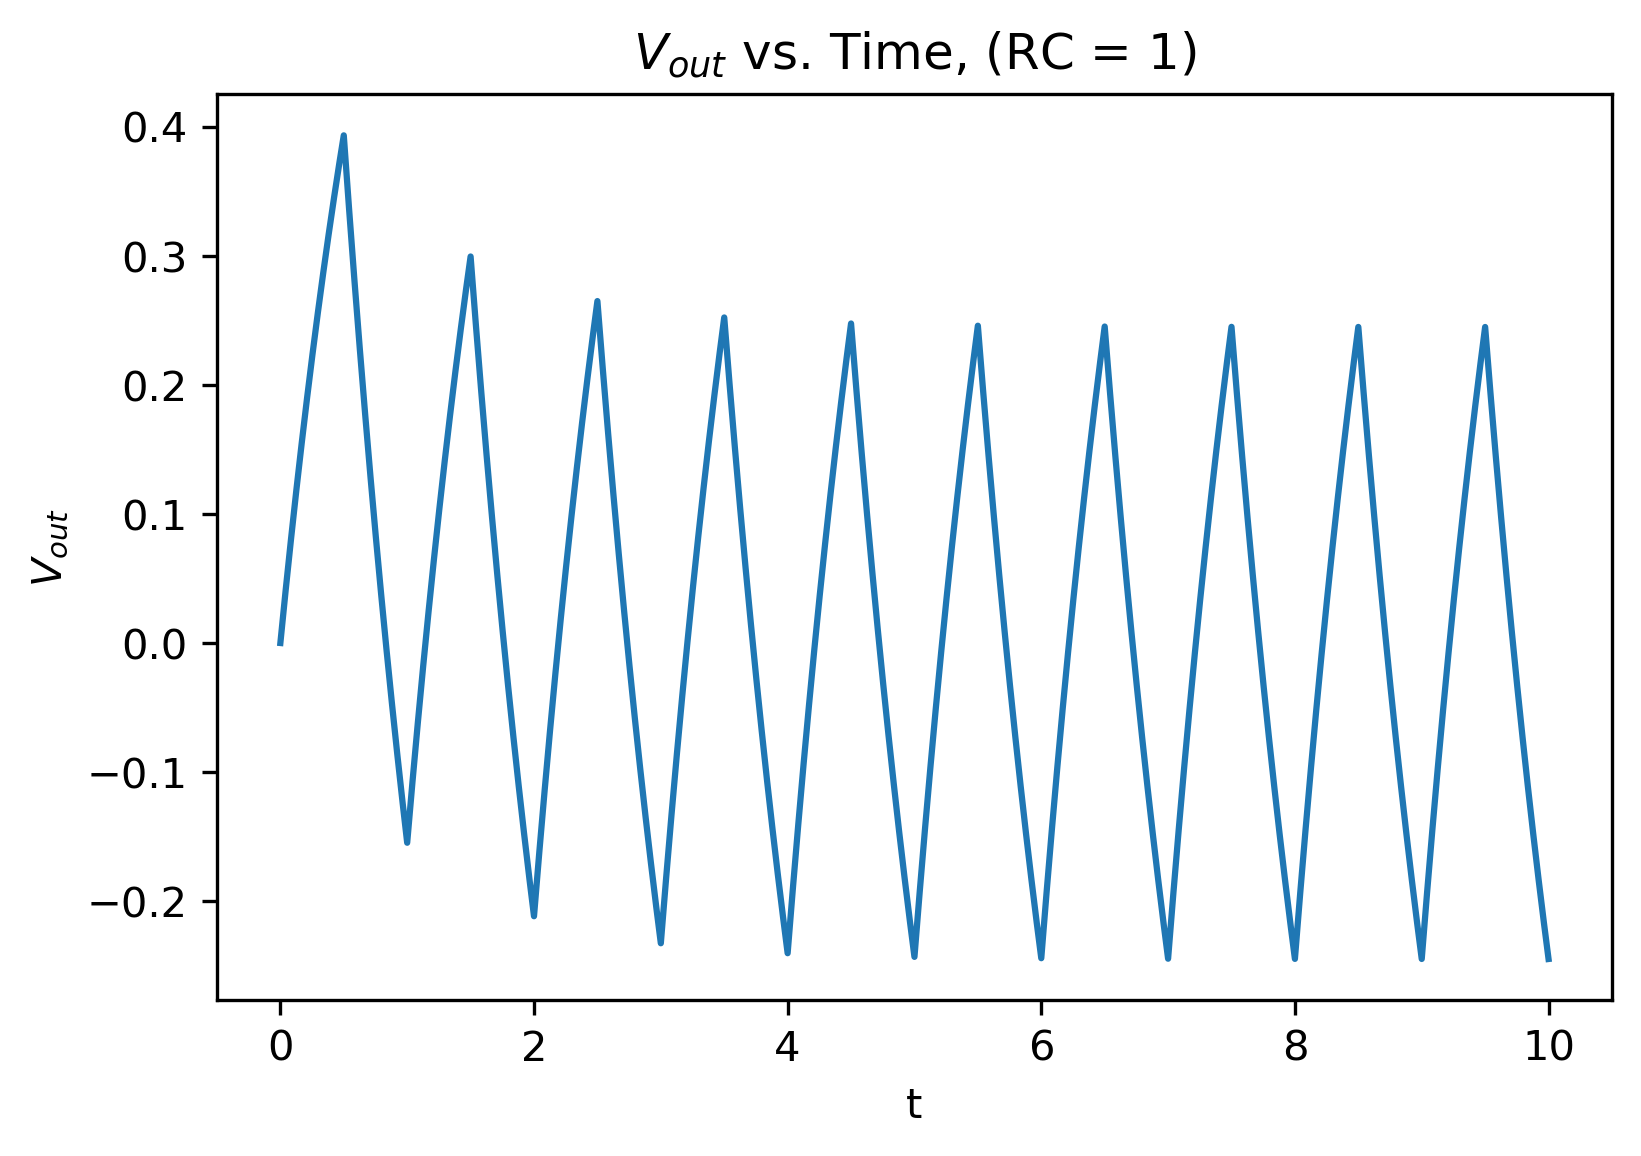

In [2]:
### Part A

def f(x,t):
     #Define the even case
    if  np.int(2*t // 1) % 2 == 0:
        return 1/RC*(1-x)
    
    #Define the odd case
    if np.int(2*t // 1) % 2 == 1:
        return 1/RC*(-1-x)

a = 0.0
b = 10.0
N = 50000
h = (b-a)/N


tpoints = np.arange(a,b+h,h)
xpoints = []
xpoints2 = []
xpoints3 = []

# initialize, define RC
x = 0.0
RC = 0.01

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
# Re-initialize, re-define RC
x = 0.0
RC = 0.1

for t in tpoints:
    xpoints2.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
# Re-initialize, re-define RC
x = 0.0
RC = 1.0

for t in tpoints:
    xpoints3.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6


# Plot
plt.figure(dpi=300)
plt.title("$V_{out}$ vs. Time, (RC = 0.01)")
plt.plot(tpoints, xpoints)
plt.xlabel("t")
plt.ylabel("$V_{out}$")
plt.show()

plt.figure(dpi=300)
plt.title("$V_{out}$ vs. Time, (RC = 0.1)")
plt.plot(tpoints, xpoints2)
plt.xlabel("t")
plt.ylabel("$V_{out}$")
plt.show()

plt.figure(dpi=300)
plt.title("$V_{out}$ vs. Time, (RC = 1)")
plt.plot(tpoints, xpoints3)
plt.xlabel("t")
plt.ylabel("$V_{out}$")
plt.show()

b) As we can see, as RC increases we see the results become less and less like that of a square wave, and more towards that of a sawtooth output.  As we increase RC in the circuit, we are effectively lowering the cutoff frequency at which the filter allows signals to pass.  As we decrease the cut-off frequency, the circuit is letting less of the original square wave signal through.

### Exercise 8.2: Rabbits and Foxes

We have the equations that model the population of rabbits, x, and the population of foxes, y:

$$\frac{dx}{dt} = \alpha x-\beta xy$$,
$$\frac{dy}{dt} = \gamma xy - \delta y$$

a) Write a program to solve these equations where $\alpha = 1, \beta = 2, \gamma = 0.5, \delta = 2$.  With initial condition $x = y = 2$

Plot both x,y as a function of time on the same axis from t = - to t = 30


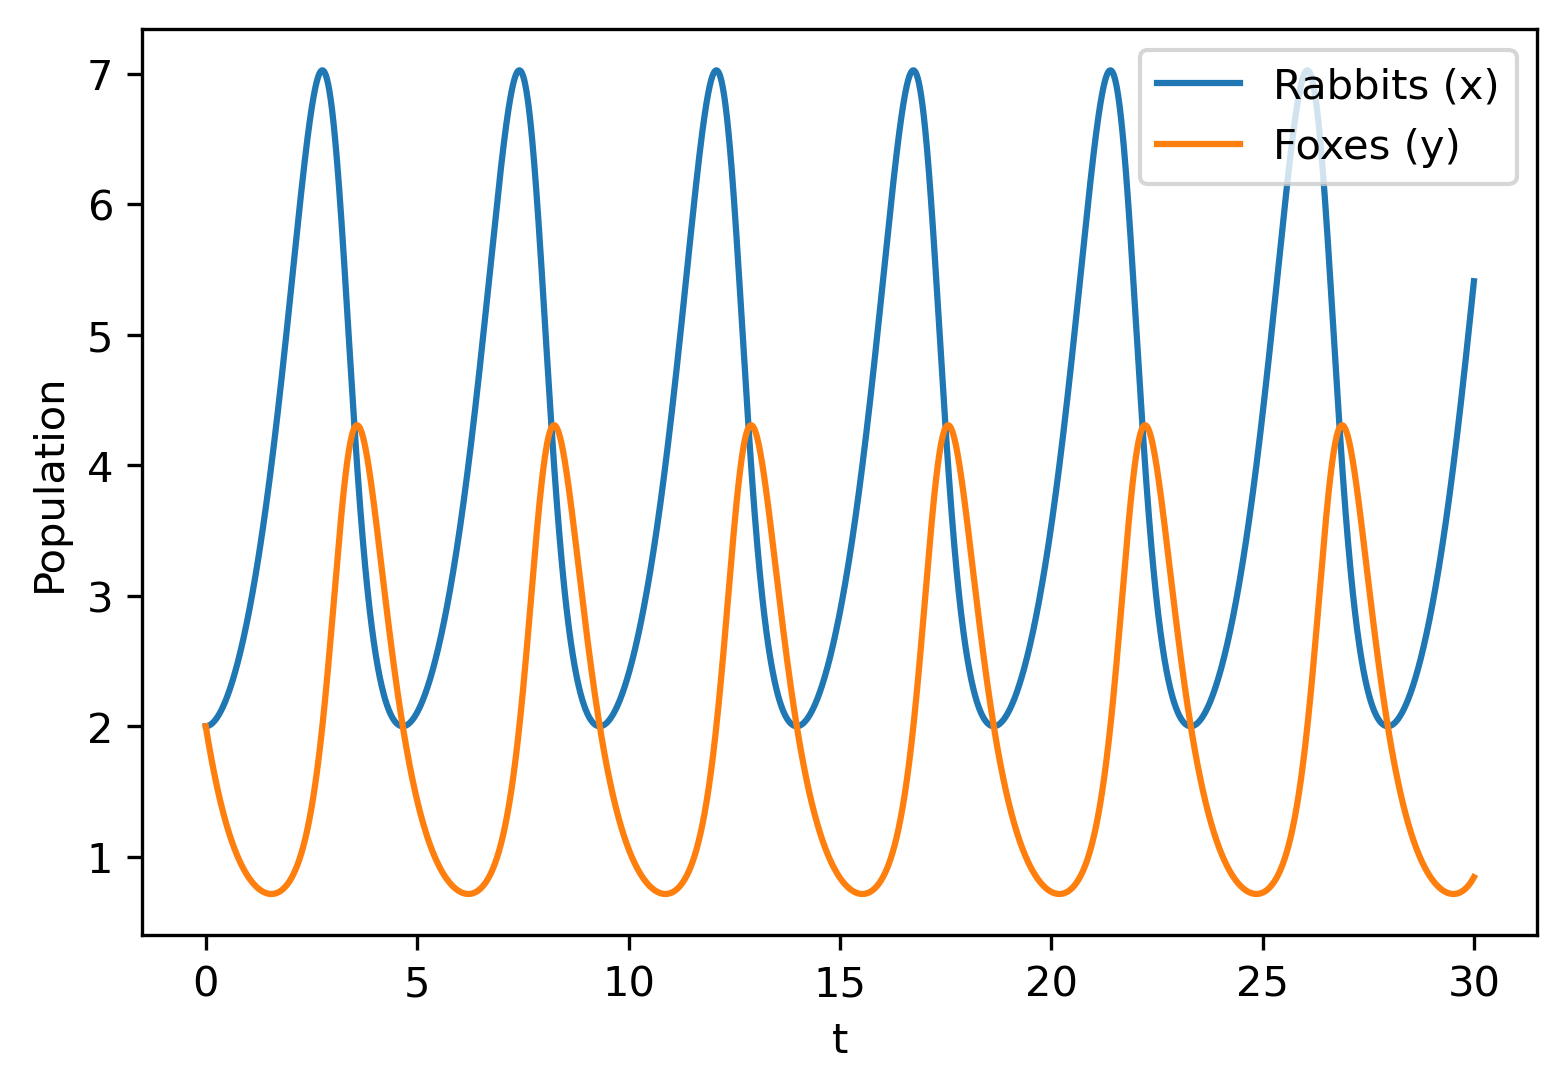

In [15]:
## Part A

# Define functions
def f(r,t):
    x = r[0]
    y = r[1]
    fx = c1*x - c2*x*y
    fy = c3*x*y - c4*y
    return np.array([fx,fy],float)

a = 0.0
b = 30.0
N = 10000
h = (b-a)/N

# Define constants
c1,c2,c3,c4 = 1,0.5,0.5,2

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

# Define Initial Condition
r = np.array([2.0,2.0],float)

# 4th-order Runge-Kutta
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
# Plot
plt.figure(dpi=300)
plt.plot(tpoints,xpoints, label = "Rabbits (x)")
plt.plot(tpoints,ypoints, label = "Foxes (y)")
plt.legend(loc = 'upper right')
plt.ylabel("Population")
plt.xlabel("t")
plt.show()

b) As we can see both populations start out at 2, but as the fox population decreases, the rabbit population explodes.  As soon as the fox population increases, the rabbit population rapidly decreases.  We see that an over abundance of rabbits causes the foxes to eat and rise, while more rabbits are eaten and the population falls.  Once, the rabbit population is too low, the foxes run out of food and the fox population falls -- then the cycle is repeated

### Exercise 8.3: Lorenz Equations

We have the Lorenz Equations:

$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = rx - y - xz$$
$$\frac{dz}{dt} = xy-bz$$

with $\sigma, r, b$ are constants.

a) Write a program to solve the Lorenz Equations for $\sigma = 10, r = 28, b = 8/3$ in the range t = 0 to t = 50, with initial conditions $(x,y,z) = (0,1,0)$.  Plot y as a function of time.

b) Modify your program to produce a plot of z vs. x.  You should see the famous "strange attractor"

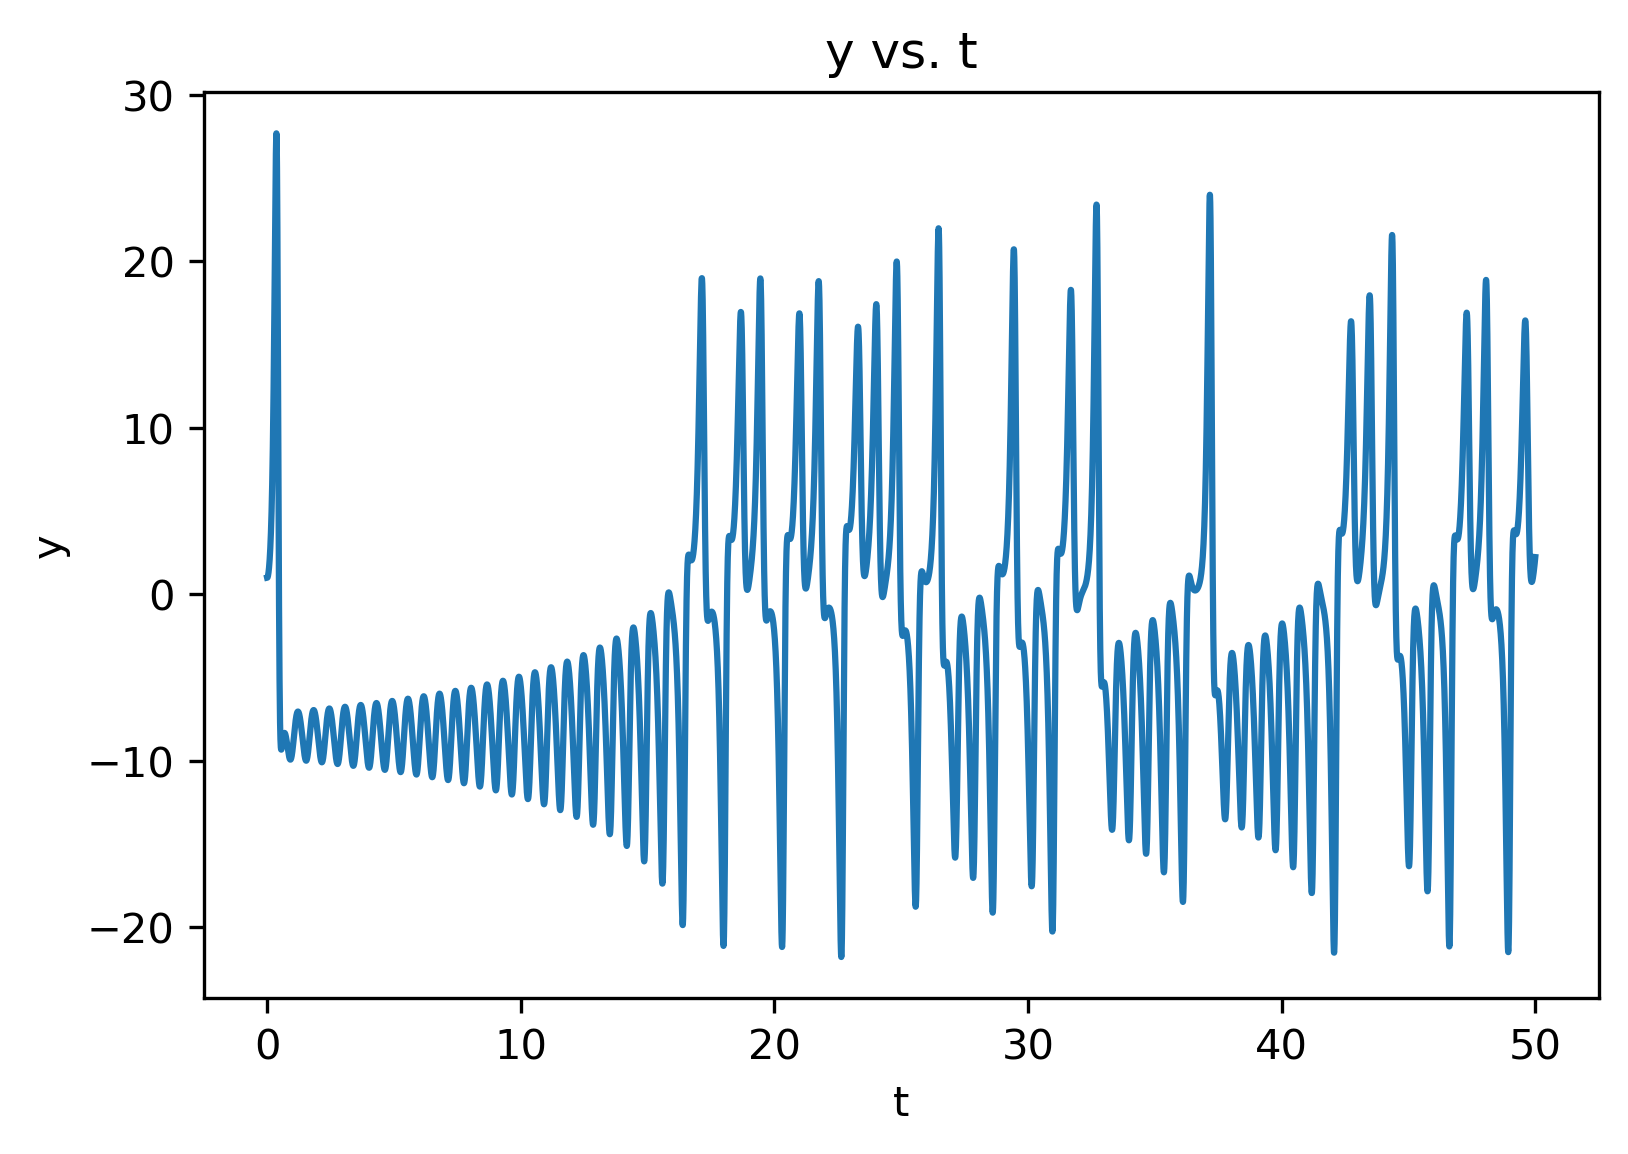

In [4]:
## Part A

# Define functions
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = c1*(y-x)
    fy = c2*x - y - x*z
    fz = x*y - c3*z
    return np.array([fx,fy, fz],float)

a = 0.0
b = 50.0
N = 10000
h = (b-a)/N

# Define constants
c1,c2,c3 = 10,28,8/3

# Initialize arrays
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

# Define Initial Condition
r = np.array([0.0,1.0,0.0],float)

# 4th-order Runge-Kutta
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


plt.figure(dpi = 300)
plt.plot(tpoints,ypoints)
plt.title("y vs. t")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

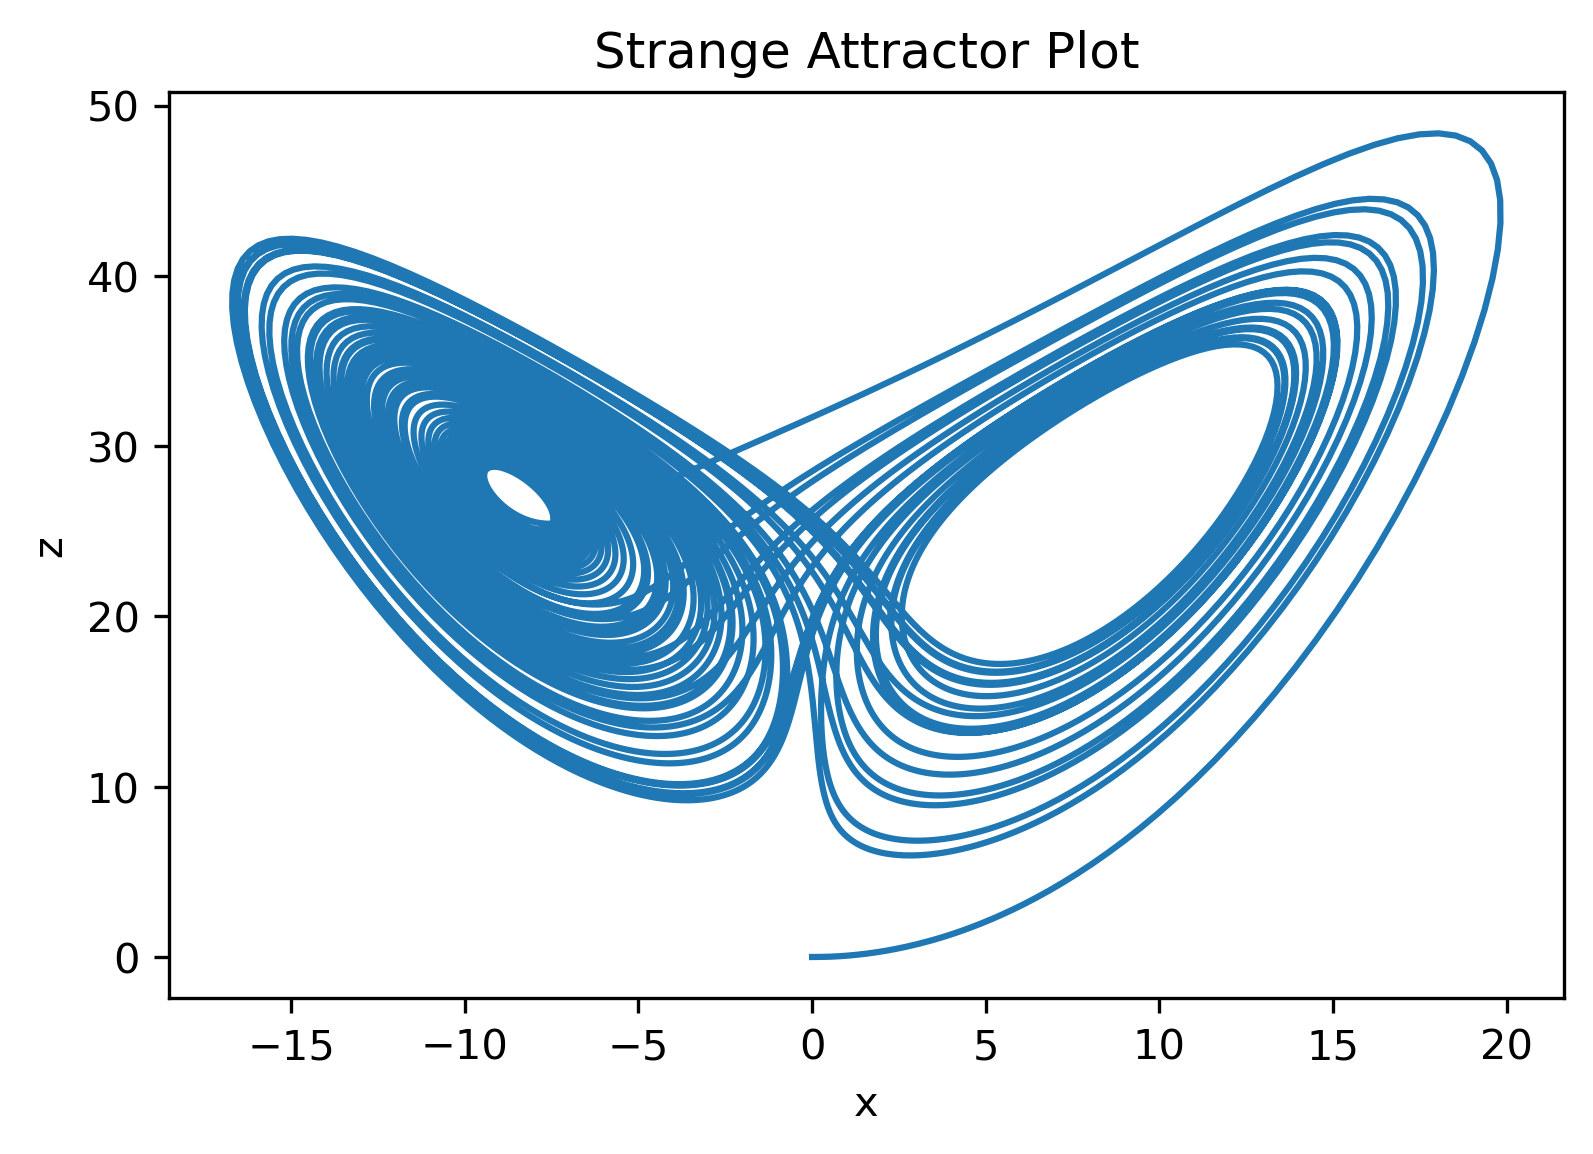

In [5]:
### Part B

plt.figure(dpi = 300)
plt.plot(xpoints,zpoints)
plt.title("Strange Attractor Plot")
plt.ylabel("z")
plt.xlabel("x")
plt.show()

### Exercise 8.7: Trajectory with Air Resistance

Consider a spherical cannonball shot from a cannon on level ground, the air resistance, in the opposite direction to motion, is:

$$F_{air} = \frac{1}{2}\pi R^2\rho Cv^2$$


where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the velocity, and $C$ is the co-efficient of drag

#####  a) Starting from $F = ma$ derive the equations of motion for the position (x,y) of the cannonball.

the cannonball is moving in the x-direction, so the only force is the force of friction
$$F_x = ma_x$$

$$-F_{air} = ma_x$$

$$-\frac{1}{2}\pi R^2\rho Cv_x \dot{r} = m\ddot{x}$$

$$-\frac{1}{2}\pi R^2\rho C\dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} = m\ddot{x}$$

Therefore, 

$$\ddot{x} = -\frac{\pi R^2\rho C}{2m}\dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}$$

Similarly for y:
$$F_y = ma_y$$

$$-F_{air}-F_g = ma_y$$

$$-mg -\frac{1}{2}\pi R^2\rho Cv_y\dot{r} = m\ddot{y}$$

$$-mg-\frac{1}{2}\pi R^2\rho C\dot{y} \sqrt{\dot{x}^2 + \dot{y}^2} = m\ddot{y}$$

Therefore,
$$\ddot{y} = -g-\frac{\pi R^2\rho C}{2m}\dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}$$


##### b) Change these into 4 1st order Diff EQ.  Then solve for and plot the trajectory of a cannon ball shot at 30 deg wrt to the horizontal: $m = 1, R = 0.08, v_0 = 100, \rho = 1.22, C = 0.47$

We now have 4 equations:

$$\frac{dx}{dt} = p$$

$$\frac{dy}{dt} = q$$

$$\frac{dp}{dt} = -\frac{1}{2m}\pi R^2\rho C p \sqrt{p^2+q^2}$$

$$\frac{dq}{dt} = -mg -\frac{1}{2m}\pi R^2\rho C q \sqrt{p^2+q^2}$$

##### c) Estimate the total distance traveled (horizontally) by the cannonball.  Investigate the effects of total distance for lighter/heavier balls.  Describe results

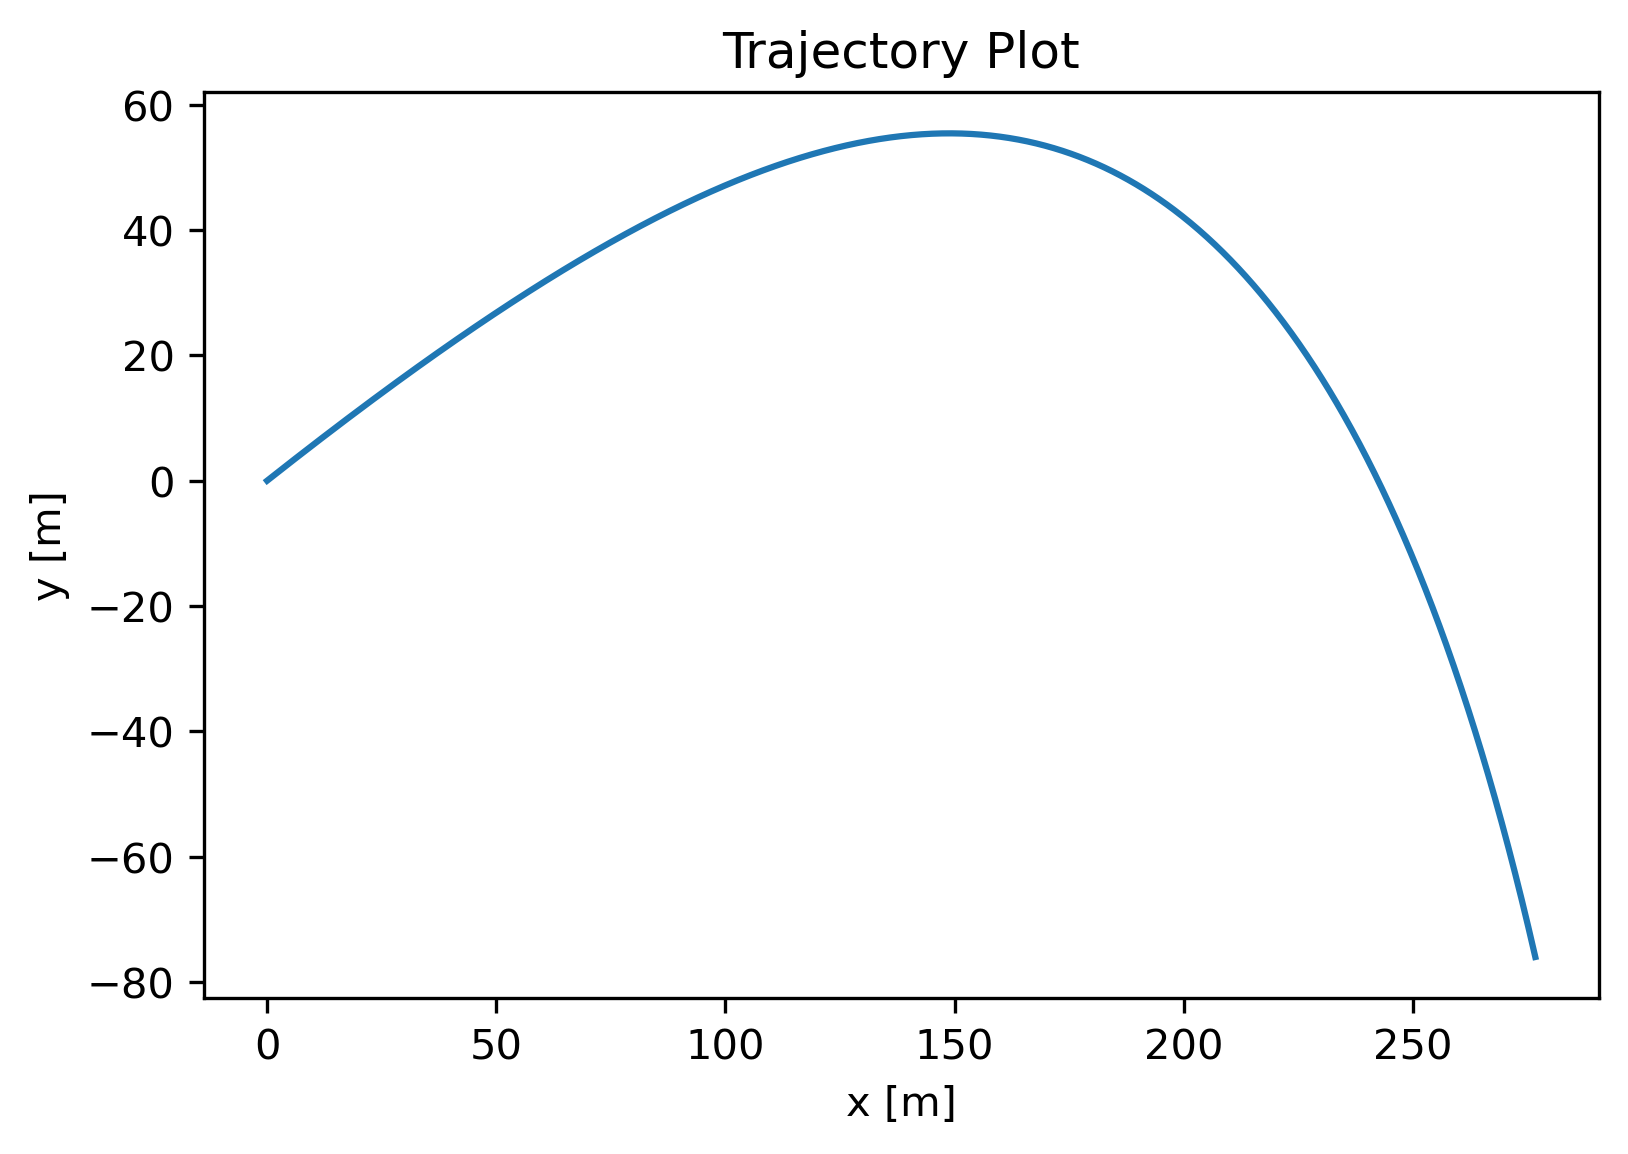

In [12]:
### Part B

# Define function
def f(r,t):
    x = r[0]
    y = r[1]
    p = r[2]
    q = r[3]
    fx = p
    fy = q
    fp = cons*p*np.sqrt(p**2+q**2)
    fq = -g+cons*q*np.sqrt(p**2+q**2)
    return np.array([fx,fy,fp,fq],float)

# Define RK Parameters
a = 0.0
b = 9
N = 1000
h = (b-a)/N

# Define constants
R = 0.08
rho = 1.22
C = 0.47
v0 = 100.0
g = 9.8
cons = -0.5*np.pi*R**2*rho*C
theta = 30*np.pi/180

# Solve for initial velocities
Vy = v0*np.sin(theta)
Vx = v0*np.cos(theta)

def trajectory(mass):
    """Solves the equations of motions for a sphere projectile with air resistance accounted for, returns the values for x,y in two arrays in that order.  Input is mass of sphere (float)"""
    cons = -0.5*np.pi*R**2*rho*C/mass
    # Initialize arrays
    tpoints = np.arange(a,b,h)
    xpoints = []
    ypoints = []

    # Define Initial Condition
    r = np.array([0.0,0.0,Vx,Vy],float)

    # 4th-order Runge-Kutta
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return [xpoints,ypoints]
    
# Plot
plt.figure(dpi=300)
plt.plot(trajectory(1)[0],trajectory(1)[1])
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Trajectory Plot")
plt.show()

The Total distance traveled for a ball of mass = 1 kg (for our time range) is: 761.3 meters


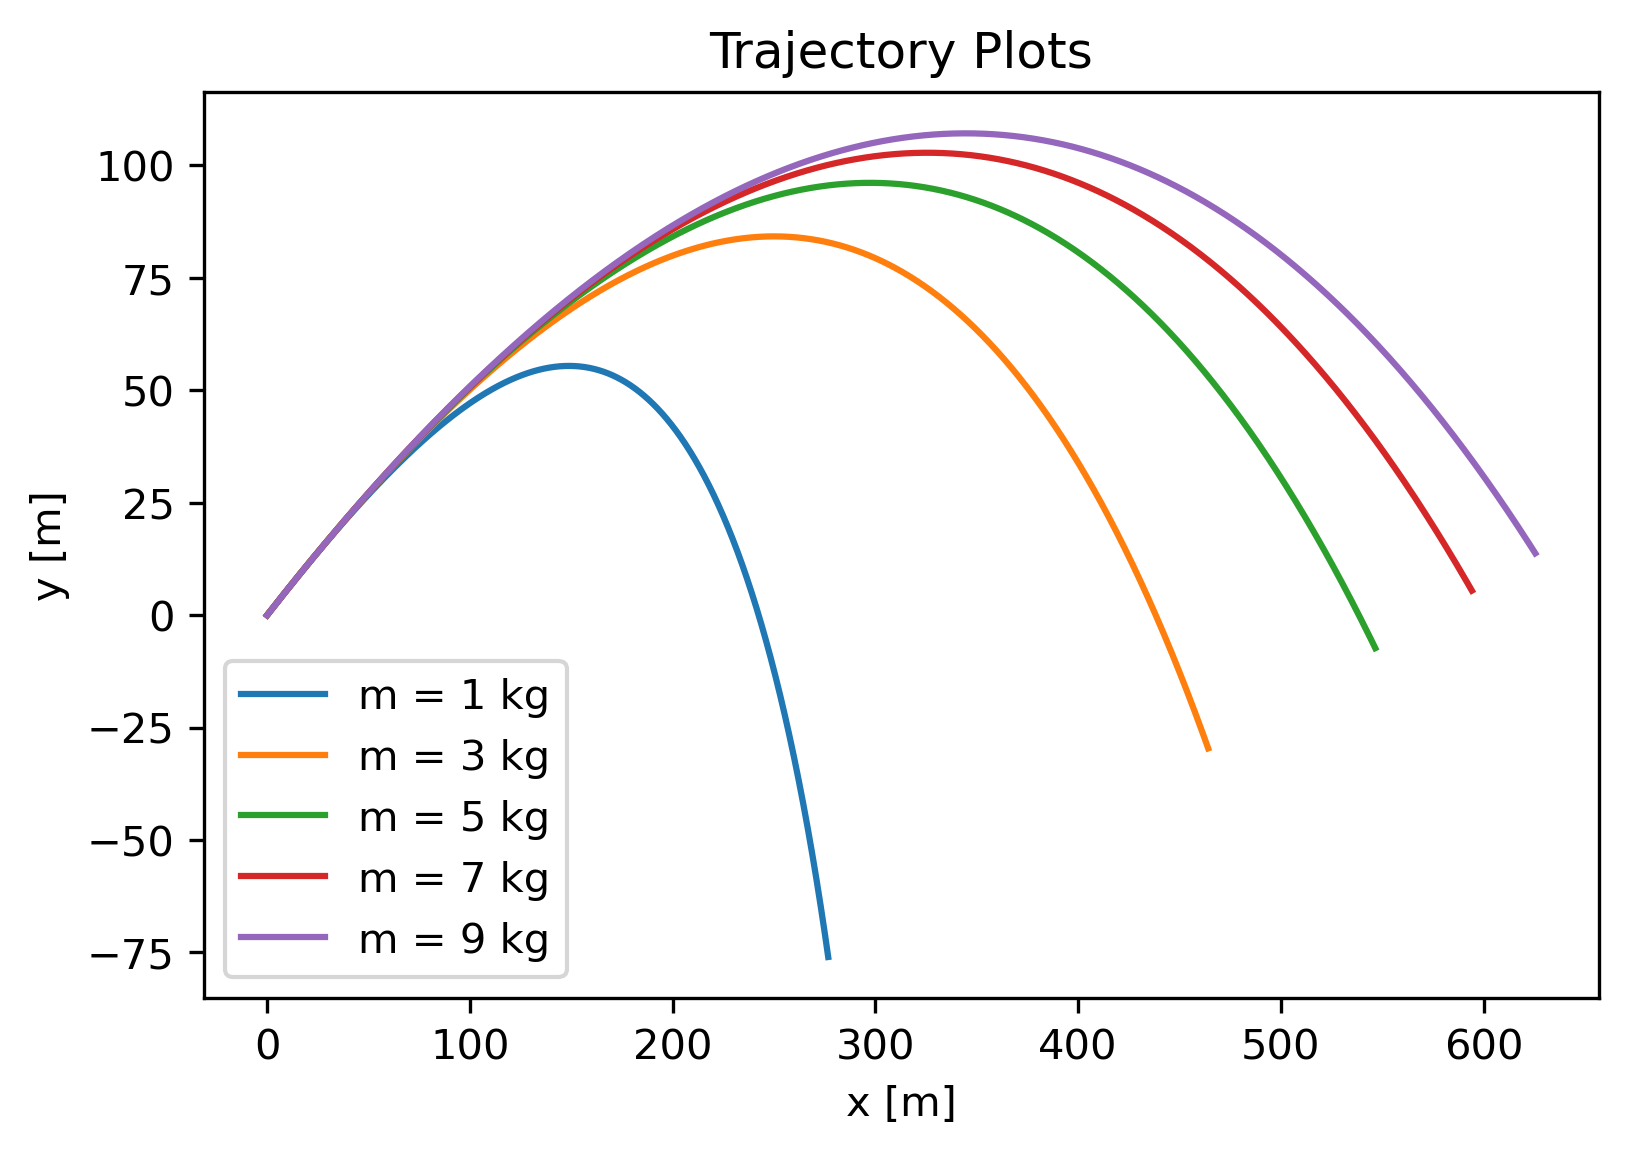

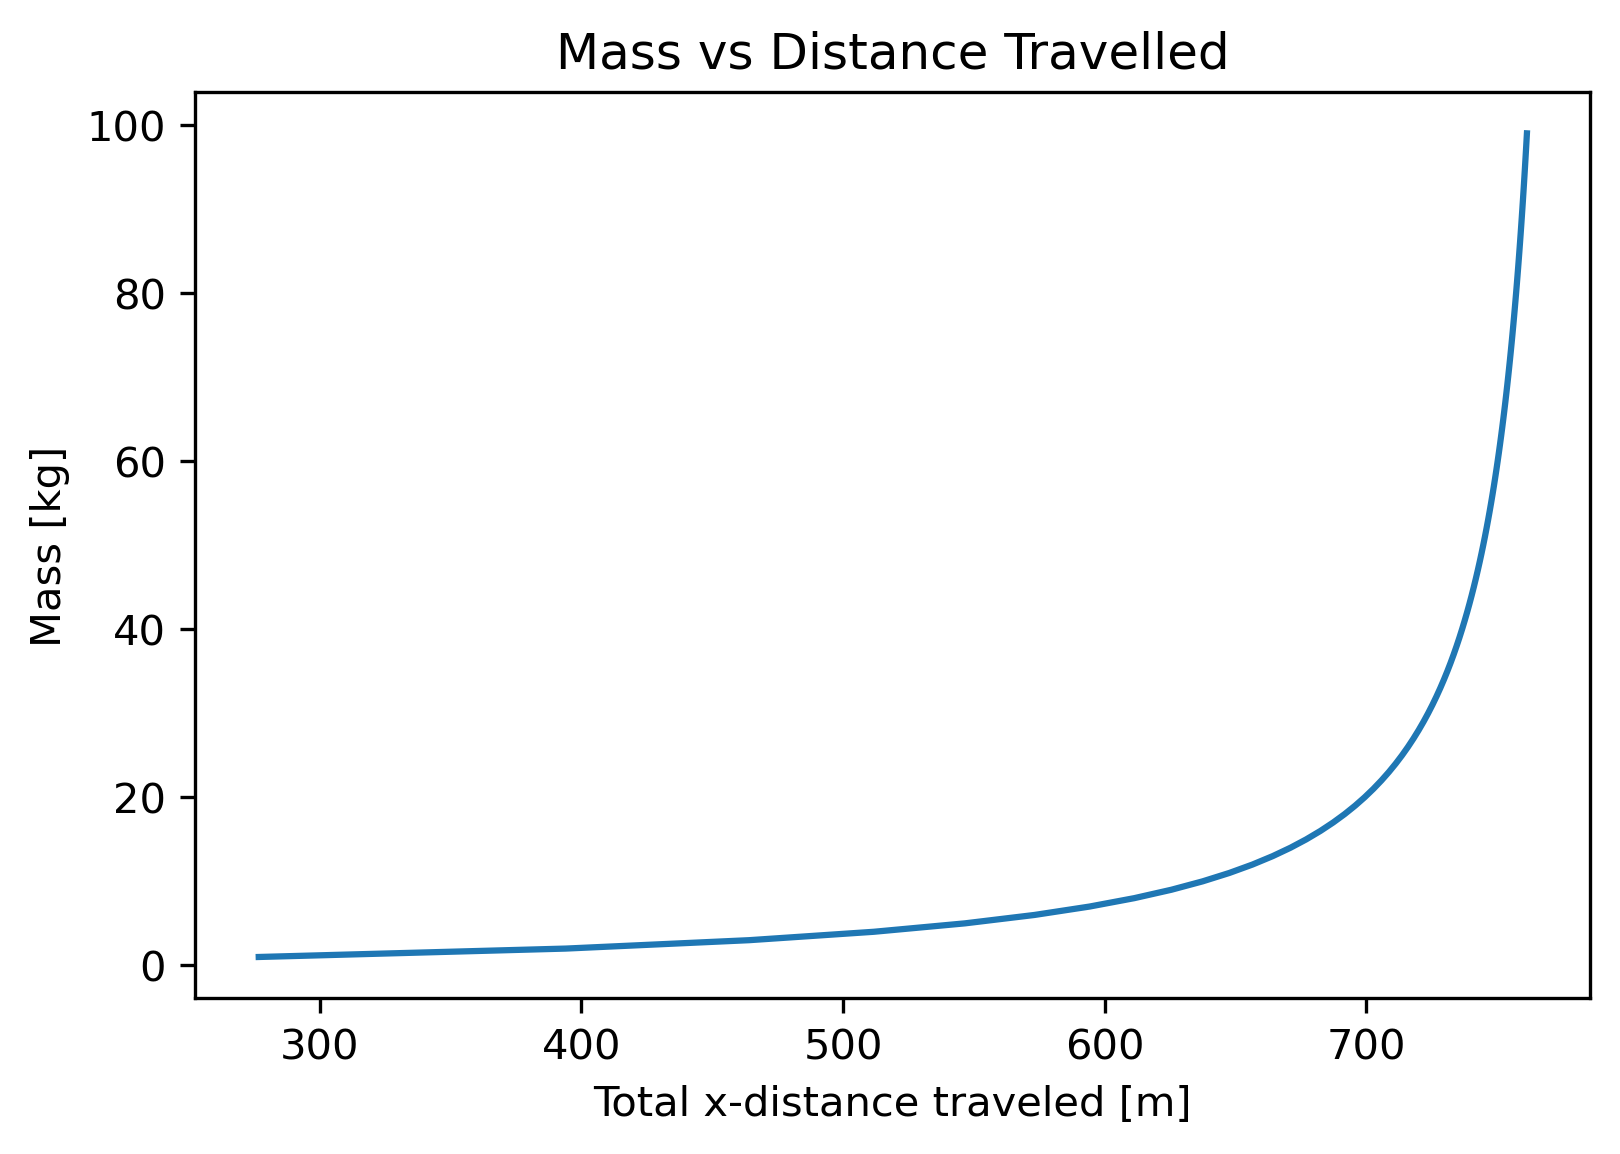

In [14]:
## Part C

# Total (horiz) Distance is the last element in calcualted x-array
total = trajectory(1)[0][-1]
print(f'The Total distance traveled for a ball of mass = 1 kg (for our time range) is: {total:4.1f} meters')

plt.figure(dpi=300)
# plot Trajectories for different m
for i in range(1,10,2):
    cons = -0.5*np.pi*R**2*rho*C/i
    plt.plot(trajectory(i)[0],trajectory(i)[1],label = "m = "+str(i)+" kg")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Trajectory Plots")
plt.legend()
plt.show()

# plot Total (horiz) distance vs mass
mass = np.arange(1,100,1)
dist = []
for i in mass:
    cons = -0.5*np.pi*R**2*rho*C/i
    dist.append(trajectory(i)[0][-1])
    
plt.figure(dpi=300)
plt.plot(dist,mass)
plt.xlabel("Total x-distance traveled [m]")
plt.ylabel("Mass [kg]")
plt.title("Mass vs Distance Travelled")
plt.show()

c) we see that as the mass of the sphere is increased, the less effect that air resistance has on the sphere, yielding it to fly farther in the x-direction.  This makes sense, as the force caused by air resistance opposes the balls motion and is inversely proportional to m, so as m is increased there is less opposition to its horizontal motion.  We also see that the maximum height of the cannon ball increases as mass is increased, consistent with the results of the x-direction.

### Exercise 8.16 (a,b): Three-Body Problem

a) Derive the equations of motion governing the positions $r_1,r_2,r_3$ for the system

$$F = m_1a_1$$

$$F_{21}+F_{31} = m_1\frac{d^2r_1}{dt^2}$$

with $F_g = Gm_1m_2/r^2$

$$\frac{Gm_1m_2}{(r_2-r_1)^2} + \frac{Gm_1m_3}{(r_3-r_1)^2} = m_1\frac{d^2r_1}{dt^2}$$

Therefore, 

$$\frac{d^2r_1}{dt^2} = \frac{Gm_2(r_2-r_1)}{|r_2-r_1|^3} + \frac{Gm_3(r_3-r_1)}{|r_3-r_1|^3}$$

Similarly we have,

$$F_{12} = \frac{Gm_2m_1}{r_{12}^2}$$ and $$F_{32} = \frac{Gm_2m_1}{r_{31}^2}$$

therefore,

$$\frac{d^2r_2}{dt^2} = \frac{Gm_1(r_1-r_2)}{|r_1-r_2|^3} + \frac{Gm_3(r_3-r_2)}{|r_3-r_2|^3}$$

and

$$\frac{d^2r_3}{dt^2} = \frac{Gm_2(r_2-r_3)}{|r_2-r_3|^3} + \frac{Gm_1(r_1-r_3)}{|r_1-r_3|^3}$$

This gives us 6 differential EQ:

$$\frac{dr_1}{dt} = a$$

$$\frac{dr_2}{dt} = b$$

$$\frac{dr_3}{dt} = c$$

$$\frac{da}{dt} = \frac{Gm_2(r_2-r_1)}{|r_2-r_1|^3} + \frac{Gm_3(r_3-r_1)}{|r_3-r_1|^3}$$

$$\frac{db}{dt} = \frac{Gm_1(r_1-r_2)}{|r_1-r_2|^3} + \frac{Gm_3(r_3-r_2)}{|r_3-r_2|^3}$$

$$\frac{dc}{dt} = \frac{Gm_2(r_2-r_3)}{|r_2-r_3|^3} + \frac{Gm_1(r_1-r_3)}{|r_1-r_3|^3}$$


b) Working in units where G = 1, write a program to solve the equations and calculate the motion of the stars from t = 0 to t = 2.  Extend this to t = 10.  Plot the trails of all 3 stars.

/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: divide by zero encountered in double_scalars


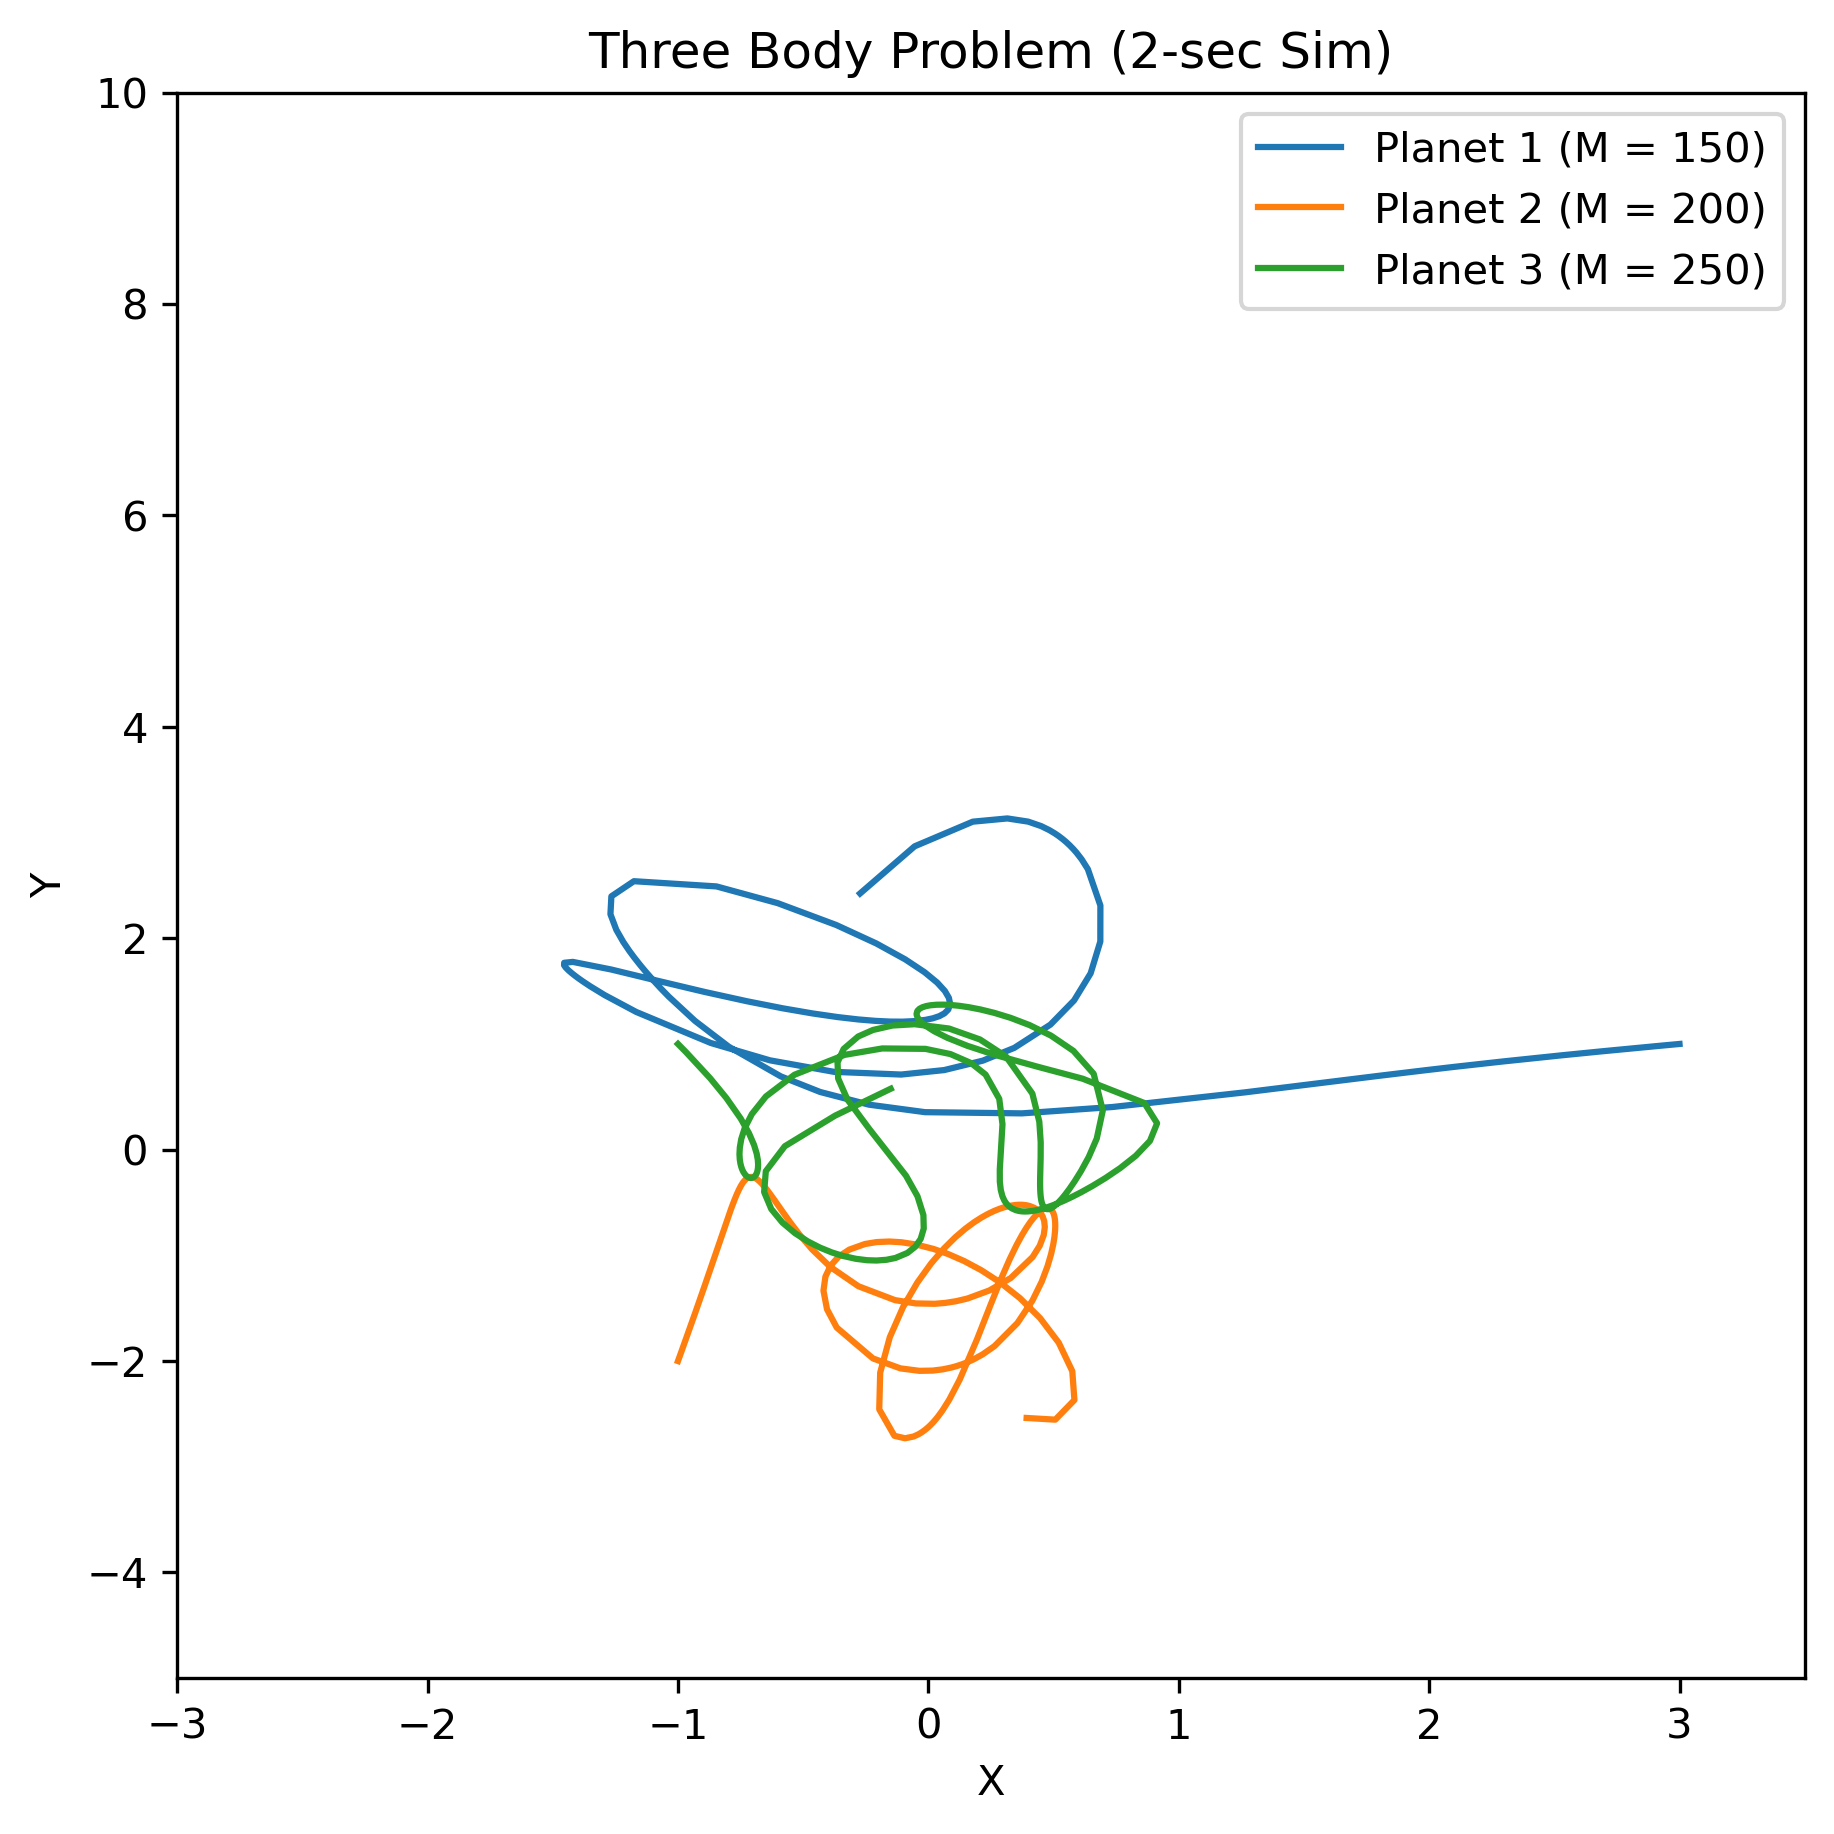

In [10]:
# Part B

# Define functions
def f(r,t):
    x1 = r[0]
    y1 = r[1]
    x2 = r[2]
    y2 = r[3]
    x3 = r[4]
    y3 = r[5]
    a1 = r[6]
    a2 = r[7]
    b1 = r[8]
    b2 = r[9]
    c1 = r[10]
    c2 = r[11]
    r21 = np.sqrt((x2 - x1)**2 + (y2-y1)**2)
    r31 = np.sqrt((x3 - x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2-y3)**2)
    fx1 = a1
    fy1 = a2
    fx2 = b1
    fy2 = b2
    fx3 = c1
    fy3 = c2
    fa1 = m2*(x2-x1)/abs(r21)**3 + m3*(x3-x1)/abs(r31)**3
    fb1 = m2*(y2-y1)/abs(r21)**3 + m3*(y3-y1)/abs(r31)**3
    fa2 = m1*(x1-x2)/abs(r21)**3 + m3*(x3-x2)/abs(r23)**3
    fb2 = m1*(y1-y2)/abs(r21)**3 + m3*(y3-y2)/abs(r23)**3
    fa3 = m1*(x1-x3)/abs(r31)**3 + m2*(x2-x3)/abs(r23)**3
    fb3 = m1*(y1-y3)/abs(r31)**3 + m2*(y2-y3)/abs(r23)**3
    return np.array([fx1,fy1,fx2,fy2,fx3,fy3,fa1,fb1,fa2,fb2,fa3,fb3],float)

a = 0.0
b = 2.0
N = 100000
h = (b-a)/N
t = 0.0
delta = 10**-3

# Define constants
m1,m2,m3 = 150,200,250

# Initialize arrays
x1points = []
y1points = []
x2points = []
y2points = []
x3points = []
y3points = []
tpoints = []

r = np.array([3,1,-1,-2,-1,1,0,0,0,0,0,0],float)
# 4th-order Runge-Kutta (adaptive-step)

while t < b:
    
    # Initialize arrays
    tpoints.append(t)
    x1points.append(r[0])
    y1points.append(r[1])
    x2points.append(r[2])
    y2points.append(r[3])
    x3points.append(r[4])
    y3points.append(r[5])

    # Two RK's with step h

    ## Step 1
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r1_ = r+(k1+2*k2+2*k3+k4)/6

    ## Step 2
    k1 = h*f(r1_,t+h)
    k2 = h*f(r1_+0.5*k1,t+h+0.5*h)
    k3 = h*f(r1_+0.5*k2,t+h+0.5*h)
    k4 = h*f(r1_+k3,t+h+h)
    r1 = r1_ + (k1+2*k2+2*k3+k4)/6

    # One RK with step 2h
    k1 = 2*h*f(r,t)
    k2 = 2*h*f(r+0.5*k1,t+0.5*2*h)
    k3 = 2*h*f(r+0.5*k2,t+0.5*2*h)
    k4 = 2*h*f(r+k3,t+2*h)
    r2 = r+(k1+2*k2+2*k3+k4)/6

#     print(r1,r2)

    # Calculate Errors

    ## Planet 1
    error1 = np.sqrt((r1[0]-r2[0])**2+(r1[1]-r2[1])**2)

    ## Planet 2
    error2 = np.sqrt((r1[2]-r2[2])**2+(r1[3]-r2[3])**2)

    ## Planet 3
    error3 = np.sqrt((r1[4]-r2[4])**2+(r1[5]-r2[5])**2)

    #     print(error1,error2,error3)
    
    
    ## Largest error
    error = np.amax([error1,error2,error3])
    
    #     print(error)
    
    
    # Define rho
    rho = 30*h*delta/error
    #     print(rho)

    # Check errors

    if error > 1e-12:
        
        ## if target accuracy is met
        if rho >= 1:

            # update time step and move on
            t = t+2*h
            r = r1
            
            # Update h, with a limit
            if rho**(1/4) > 2:
                h = 2*h
                
            else:
                h = h*rho**(1/4)
                
        ## if target accuracy is not met
        else:
            
            #Re-do with an updated h
            if rho**(1/4) > 2:
                h = 2*h

            else:
                h = h*rho**(1/4)
        
    else:
        r = r2
        t = t + 2*h
        h = 2*h

plt.figure(1,[7,7],dpi=300)
plt.plot(x1points,y1points, label = "Planet 1 (M = 150)")
plt.plot(x2points,y2points, label = "Planet 2 (M = 200)")
plt.plot(x3points,y3points, label = "Planet 3 (M = 250)")

plt.xlim(-3,3.5)
plt.ylim(-5,10)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Three Body Problem (2-sec Sim)")
plt.legend()
plt.show()

/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars


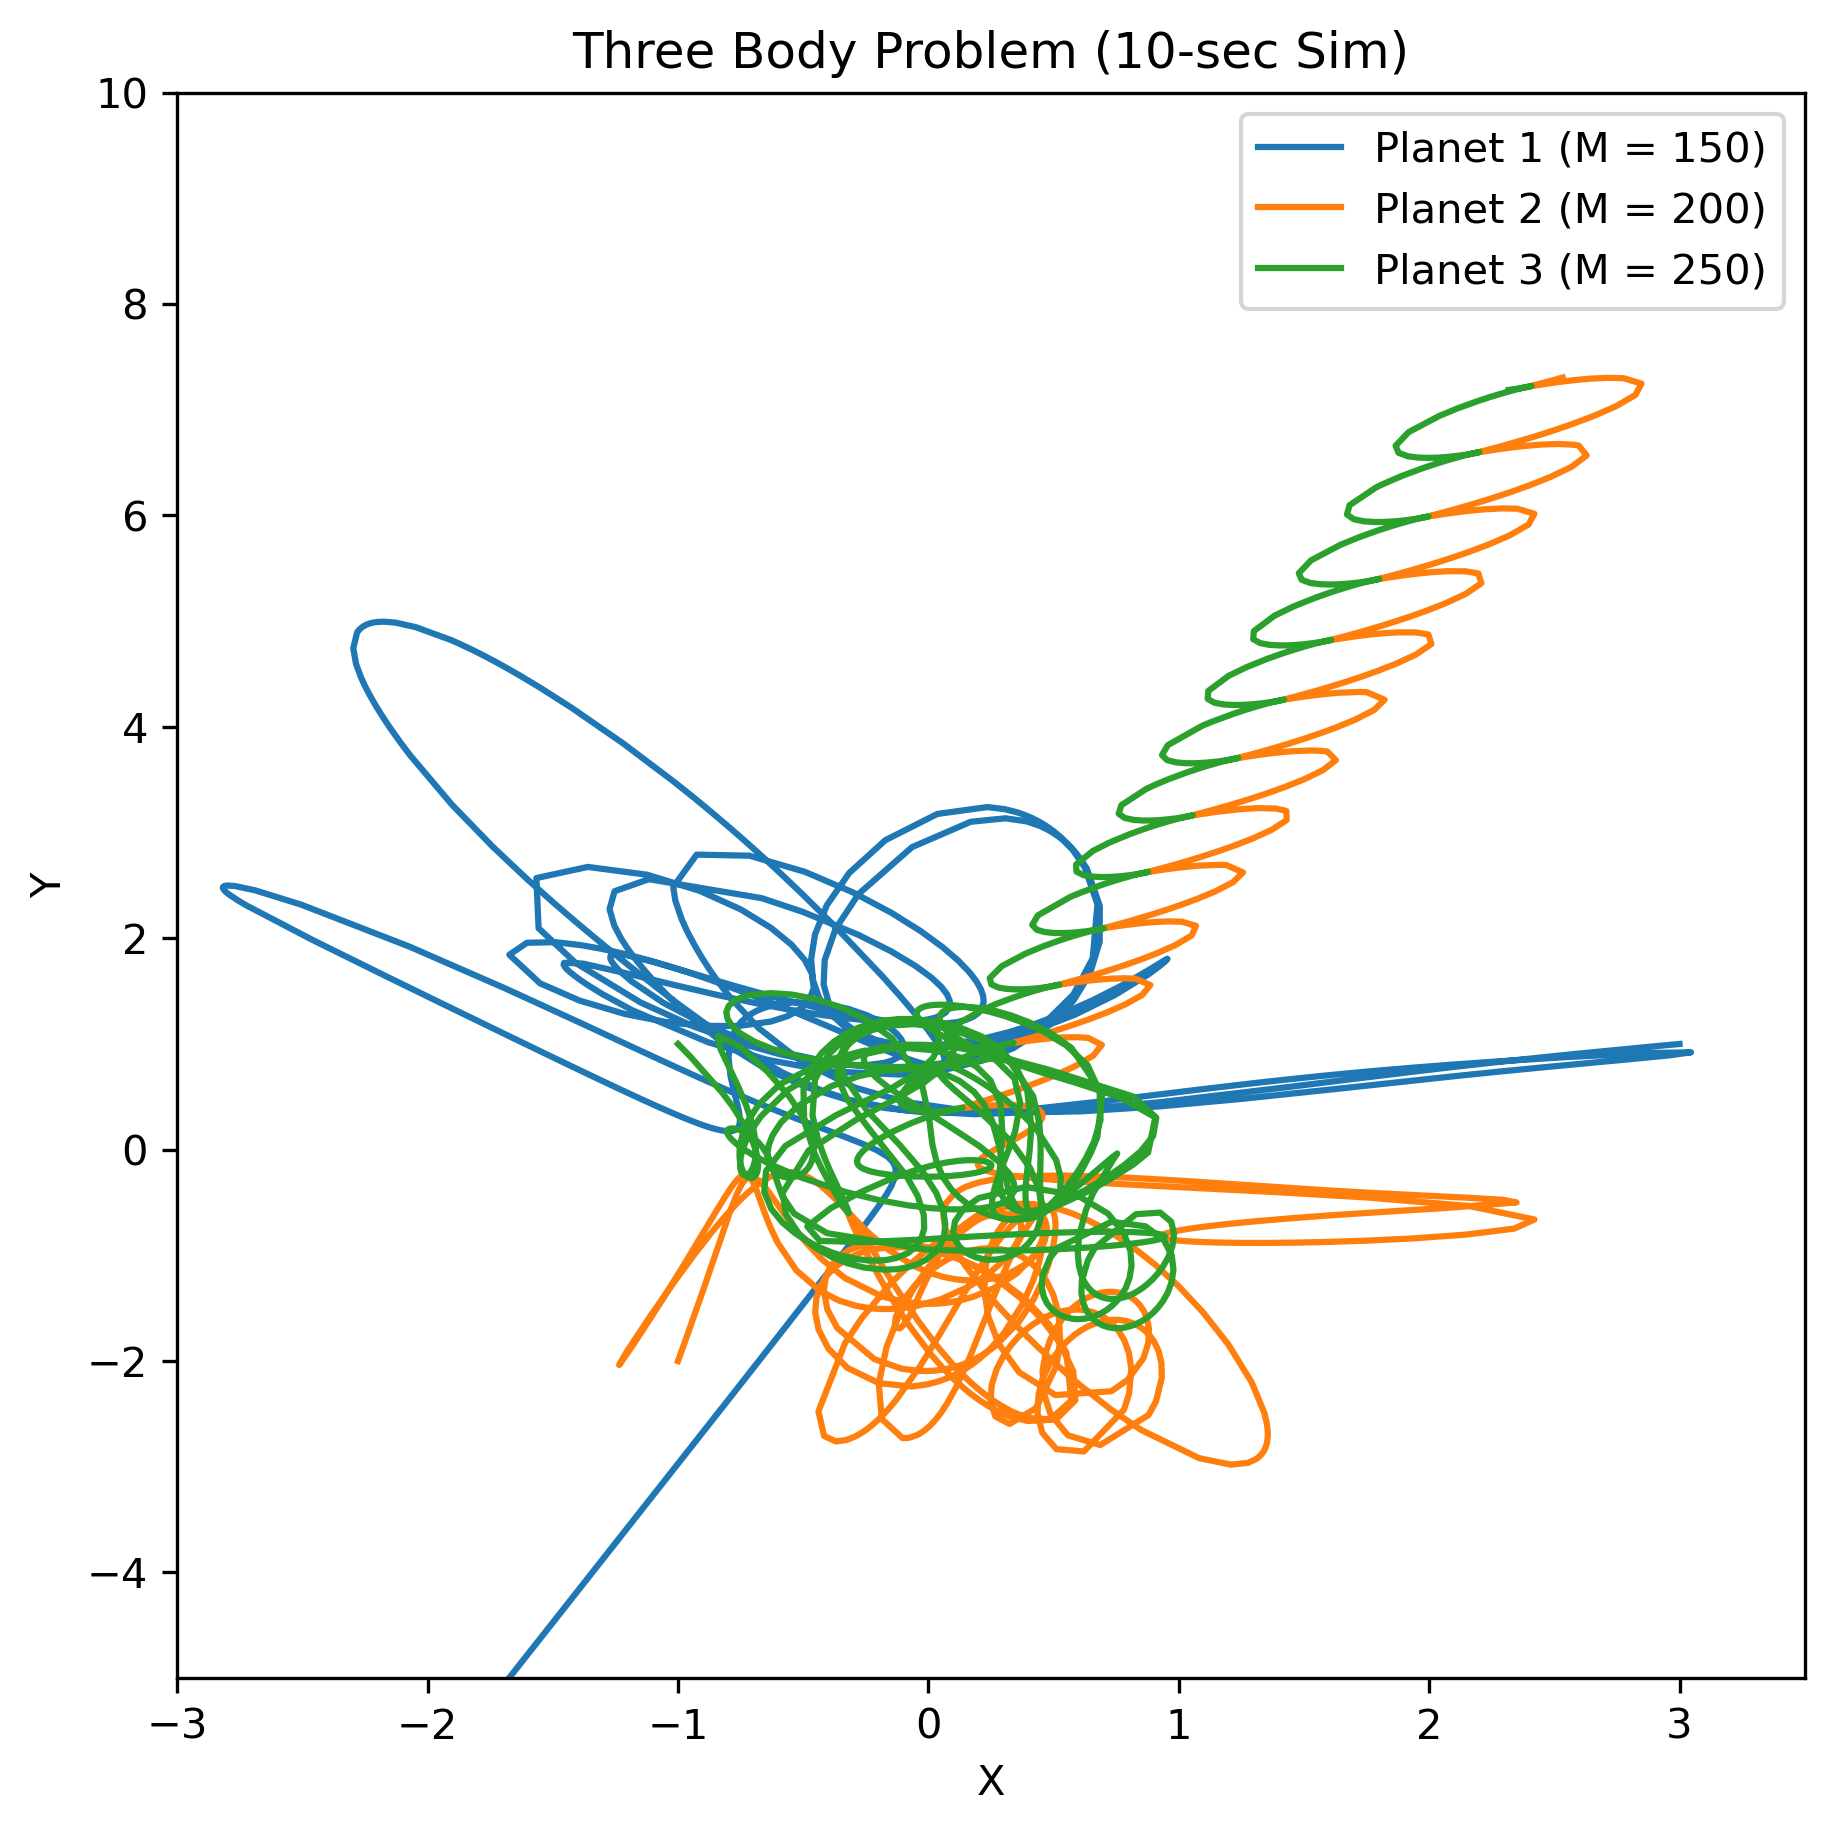

In [9]:
a = 0.0
b = 10.0
N = 100000
h = (b-a)/N
t = 0.0
delta = 10**-3

# Define constants
m1,m2,m3 = 150,200,250

# Initialize arrays
x1points = []
y1points = []
x2points = []
y2points = []
x3points = []
y3points = []
tpoints = []

r = np.array([3,1,-1,-2,-1,1,0,0,0,0,0,0],float)
# 4th-order Runge-Kutta (adaptive-step)

while t < b:
    
    # Initialize arrays
    tpoints.append(t)
    x1points.append(r[0])
    y1points.append(r[1])
    x2points.append(r[2])
    y2points.append(r[3])
    x3points.append(r[4])
    y3points.append(r[5])

    # Two RK's with step h

    ## Step 1
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r1_ = r+(k1+2*k2+2*k3+k4)/6

    ## Step 2
    k1 = h*f(r1_,t+h)
    k2 = h*f(r1_+0.5*k1,t+h+0.5*h)
    k3 = h*f(r1_+0.5*k2,t+h+0.5*h)
    k4 = h*f(r1_+k3,t+h+h)
    r1 = r1_ + (k1+2*k2+2*k3+k4)/6

    # One RK with step 2h
    k1 = 2*h*f(r,t)
    k2 = 2*h*f(r+0.5*k1,t+0.5*2*h)
    k3 = 2*h*f(r+0.5*k2,t+0.5*2*h)
    k4 = 2*h*f(r+k3,t+2*h)
    r2 = r+(k1+2*k2+2*k3+k4)/6

#     print(r1,r2)

    # Calculate Errors

    ## Planet 1
    error1 = np.sqrt((r1[0]-r2[0])**2+(r1[1]-r2[1])**2)

    ## Planet 2
    error2 = np.sqrt((r1[2]-r2[2])**2+(r1[3]-r2[3])**2)

    ## Planet 3
    error3 = np.sqrt((r1[4]-r2[4])**2+(r1[5]-r2[5])**2)

    #     print(error1,error2,error3)
    
    
    ## Largest error
    error = np.amax([error1,error2,error3])
    
    #     print(error)
    
    
    # Define rho
    rho = 30*h*delta/error
    #     print(rho)

    # Check errors

    if error > 1e-12:
        
        ## if target accuracy is met
        if rho >= 1:

            # update time step and move on
            t = t+2*h
            r = r1
            
            # Update h, with a limit
            if rho**(1/4) > 2:
                h = 2*h
                
            else:
                h = h*rho**(1/4)
                
        ## if target accuracy is not met
        else:
            
            #Re-do with an updated h
            if rho**(1/4) > 2:
                h = 2*h

            else:
                h = h*rho**(1/4)
        
    else:
        r = r2
        t = t + 2*h
        h = 2*h

plt.figure(1,[7,7],dpi=300)
plt.plot(x1points,y1points, label = "Planet 1 (M = 150)")
plt.plot(x2points,y2points, label = "Planet 2 (M = 200)")
plt.plot(x3points,y3points, label = "Planet 3 (M = 250)")

plt.xlim(-3,3.5)
plt.ylim(-5,10)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Three Body Problem (10-sec Sim)")
plt.legend()
plt.show()

### Exercise 9.3: Poisson's EQ

Consider 2 metal plates, each with charge +1 V and -1 V inside a conductive box that is grounded.  Write a program to calculate the electrostatic potential in the box on a grid of 100x100 points.

We have Poisson's EQ:

$$\nabla^2 \phi = \frac{-\rho}{\epsilon_0}$$

With $\rho$ being the charge distribution and $phi$ the electrostatic potential.

In our case we do not have a charge distribution, but rather an extension of the boundary conditions, so we can treat this as Laplace's Eq:

$$\nabla^2 \phi = 0$$

In [44]:
%%time
### Use Relaxation Method:

# Create Grid
N = 100
phi = np.zeros([N,N],float)

# Set boundary values of two plates:

# Positive Plate
phi[19:79,19] = 1

# Negative Plate
phi[19:79,79] = -1

# Create holding array
phiprime = np.empty([N,N],float)

# Set constants
error = 1e-8
delta = 1000

while delta > error:
    
    #Loop through whole grid
    for i in range(N):
        for j in range(N):
            
            # Boundary Condition
            if i == 0 or j == 0 or j == 99 or i == 99:
                phiprime[i,j] = 0
                
            # Plate Conditions
            elif j == 19 and 19 <= i <= 79:
                phiprime[i,j] = 1
            elif j == 79 and 19 <= i <= 79:
                phiprime[i,j] = -1
                
            # Compute average
            else:
                phiprime[i,j] = 1/4*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])
    
    # Calculate error
    delta = np.max(np.abs(phiprime-phi))
    
    # Swap arrays and continue
    phiprime,phi = phi,phiprime


CPU times: user 1min 22s, sys: 250 ms, total: 1min 22s
Wall time: 1min 22s


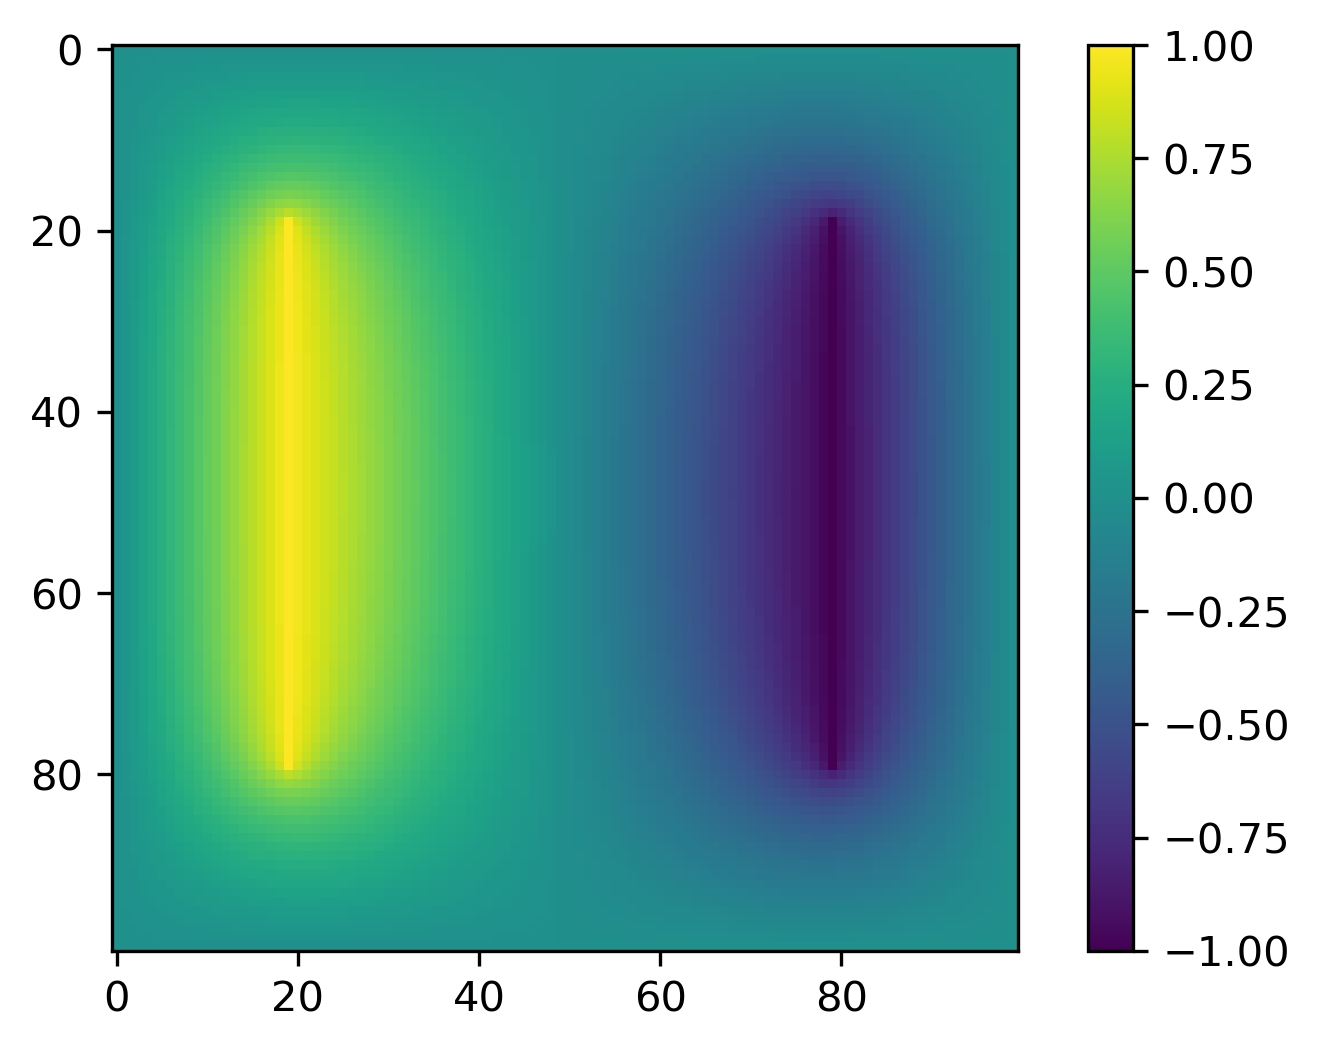

In [45]:
# Plot Results
plt.figure(dpi=300)
plt.imshow(phi)
plt.colorbar()
plt.show()